In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer


In [3]:
df = pd.read_csv('Concrete_Data.csv')

In [11]:
df.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.shape

(1030, 9)

In [7]:
df.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

In [9]:
df.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [13]:
X = df.drop(columns=['CMS'])
y = df.iloc[:,-1]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Applying Regression without any transformation

In [15]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6275531792314848

Cross Validation

In [ ]:
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.46099404916628683

plotting the displots without any transformation

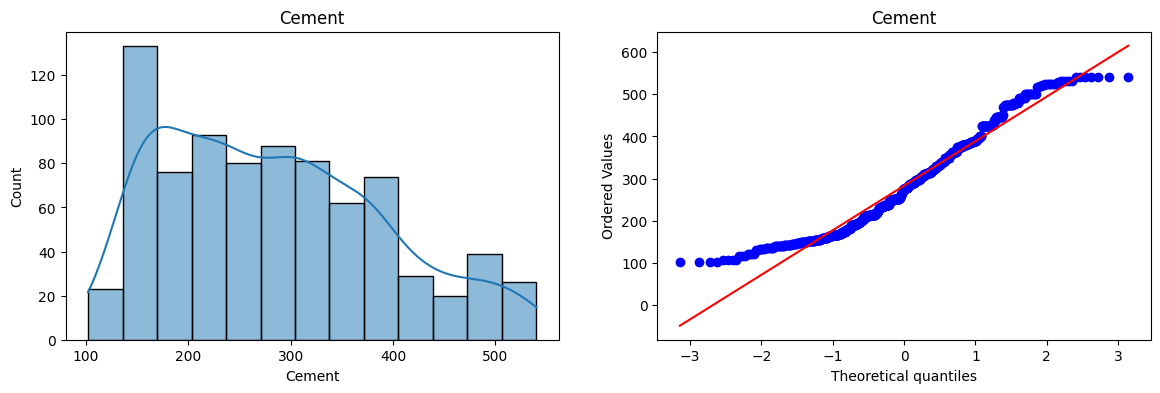

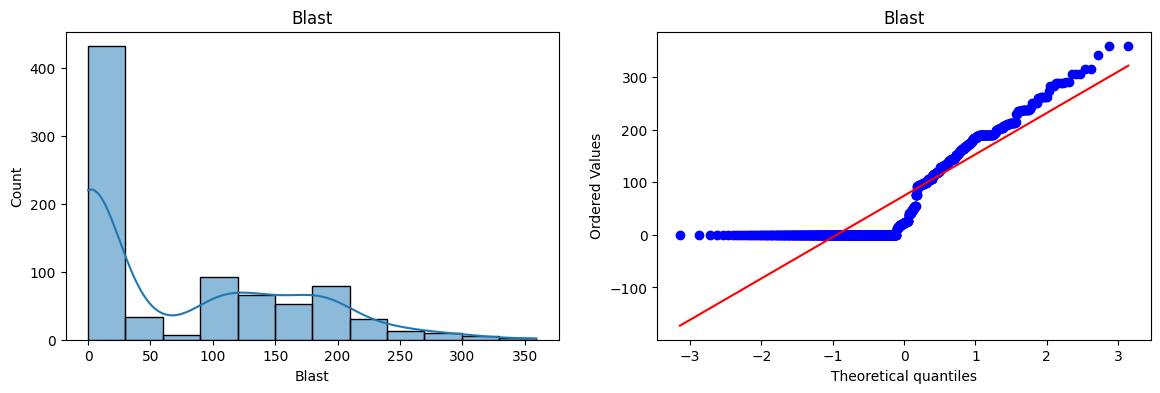

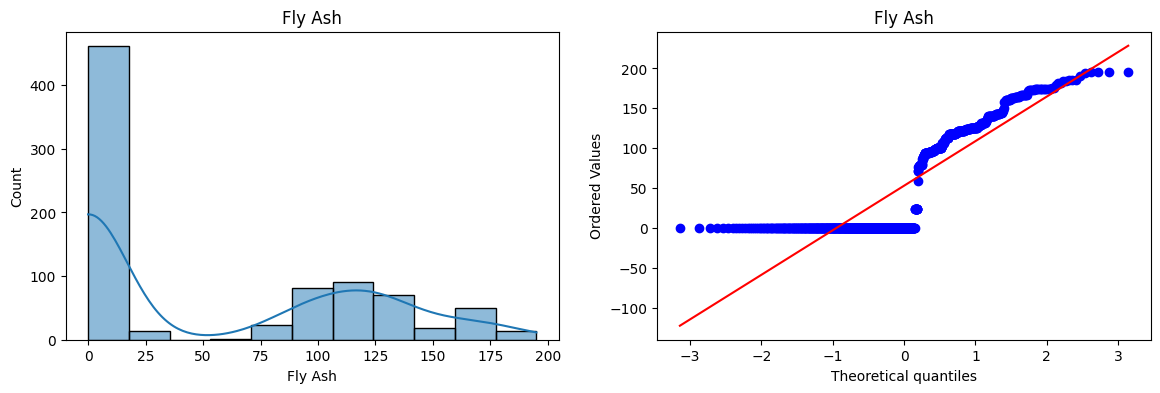

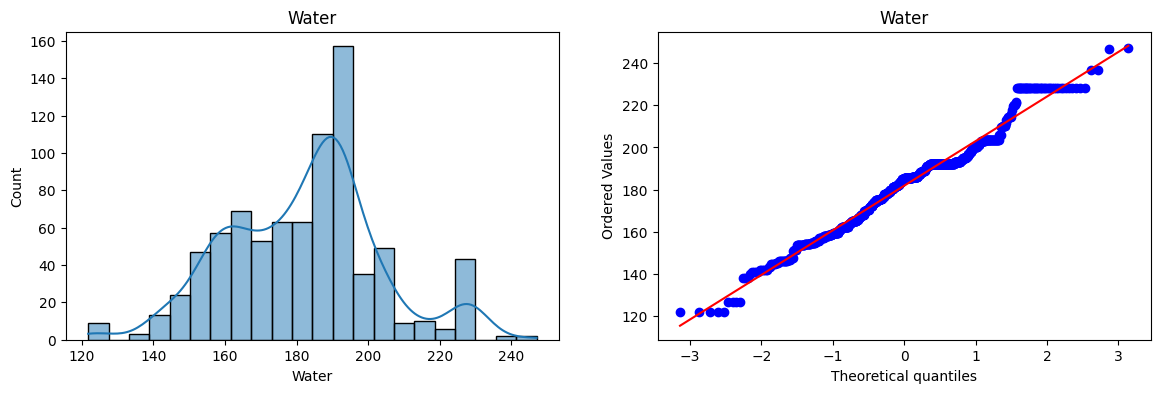

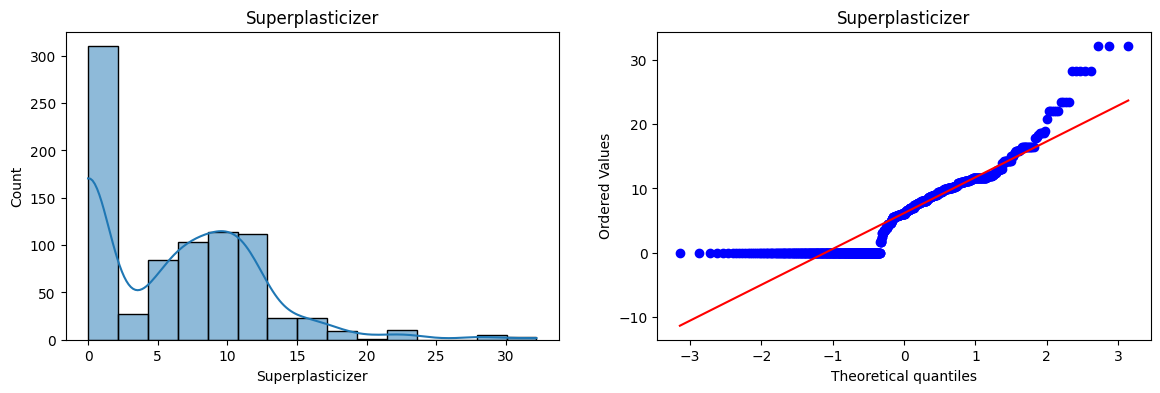

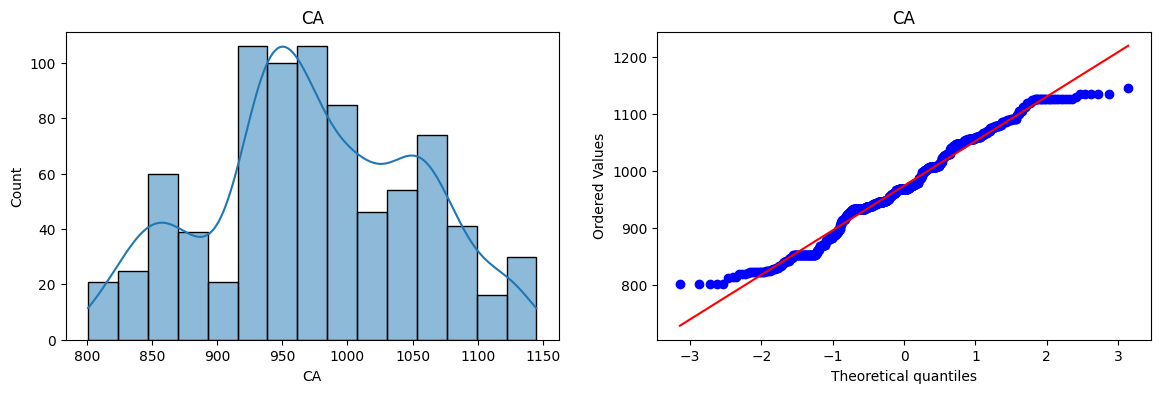

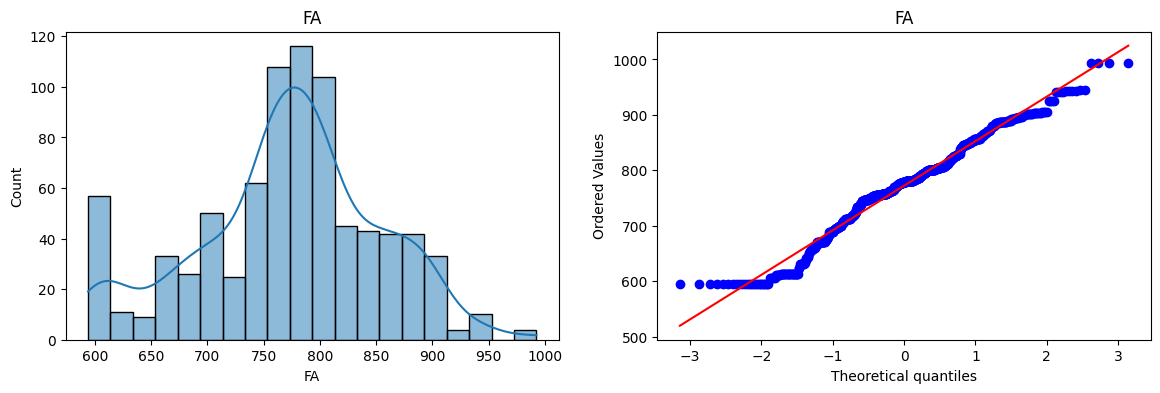

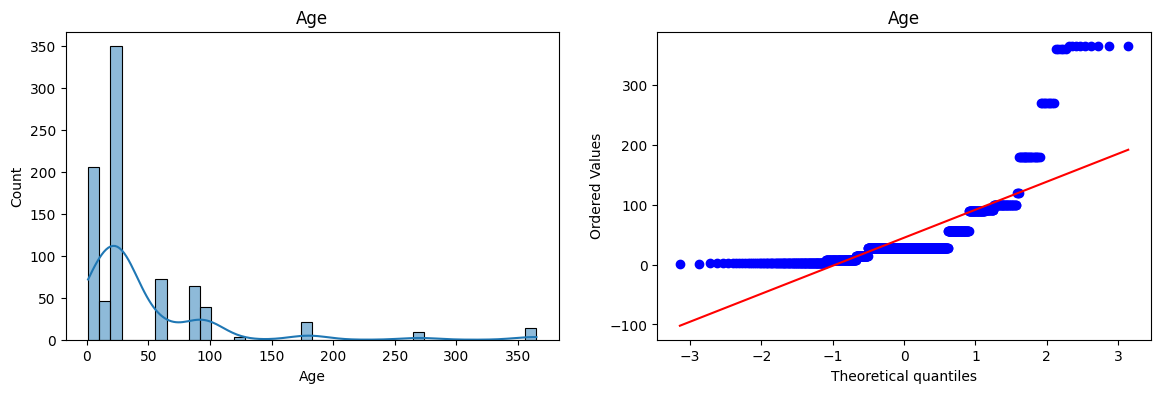

In [17]:
for col in X_train.columns :
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist="norm",plot=plt)
    plt.title(col)
    plt.show()

Applying Box Cox Transformation

In [20]:
pt = PowerTransformer(method = 'box-cox')

X_train_transformed = pt.fit_transform(X_train + 0.000001)
X_test_transformed = pt.transform(X_test + 0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}) #all the lambda values of all columns

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,CA,1.129813
6,FA,1.782018
7,Age,0.066631


Applying Linear Regression on transformed data

In [22]:
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)
r2_score(y_test,y_pred2)

0.8047825011695537

Using cross val score

In [23]:
pt = PowerTransformer(method = 'box-cox')
X_transfomed = pt.fit_transform(X+0.000001)
lr = LinearRegression()
np.mean(cross_val_score(lr,X_transfomed,y,scoring='r2'))

0.6662950324463968

Before and after comparison of Box Cox Transform

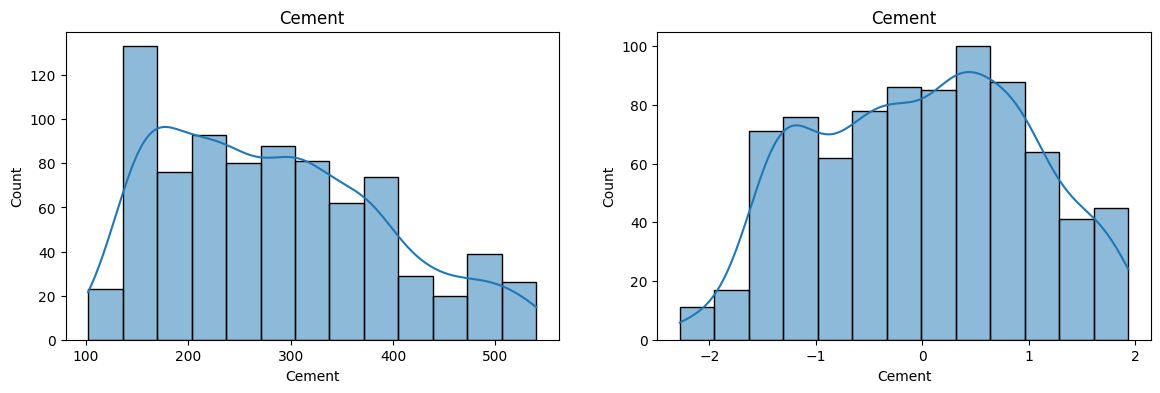

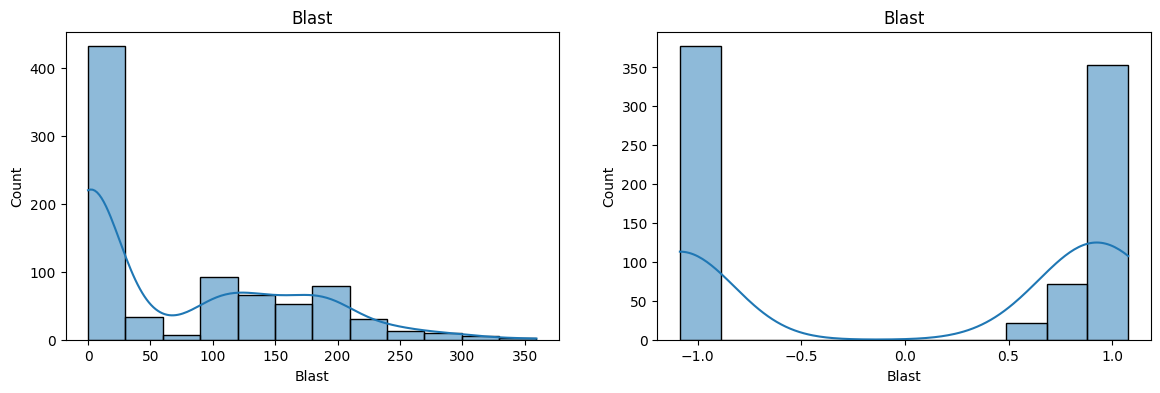

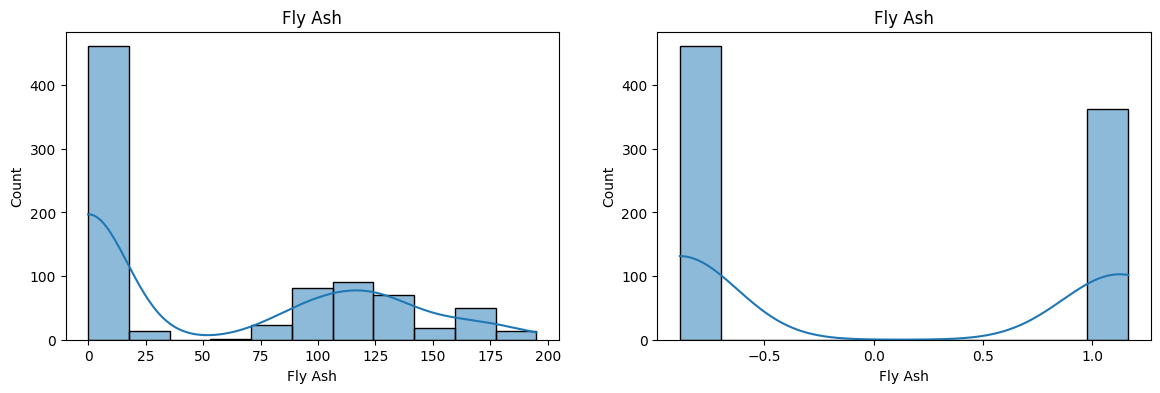

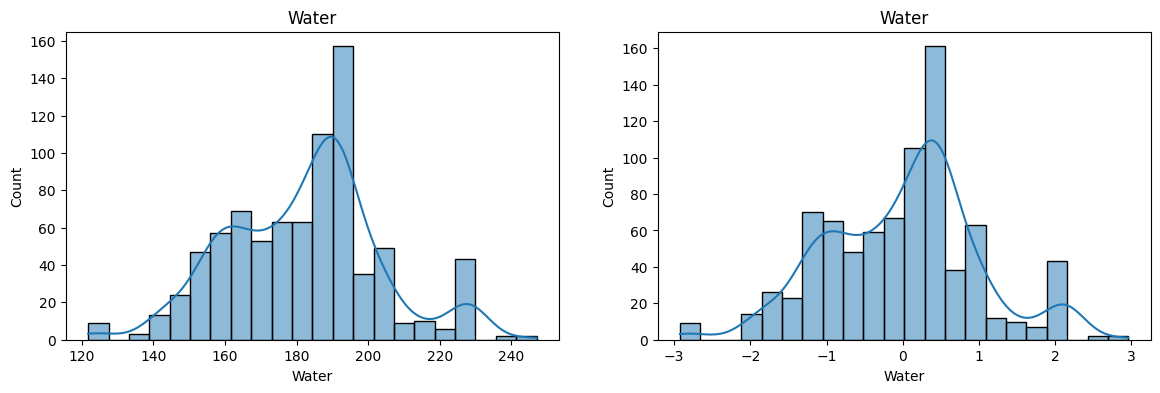

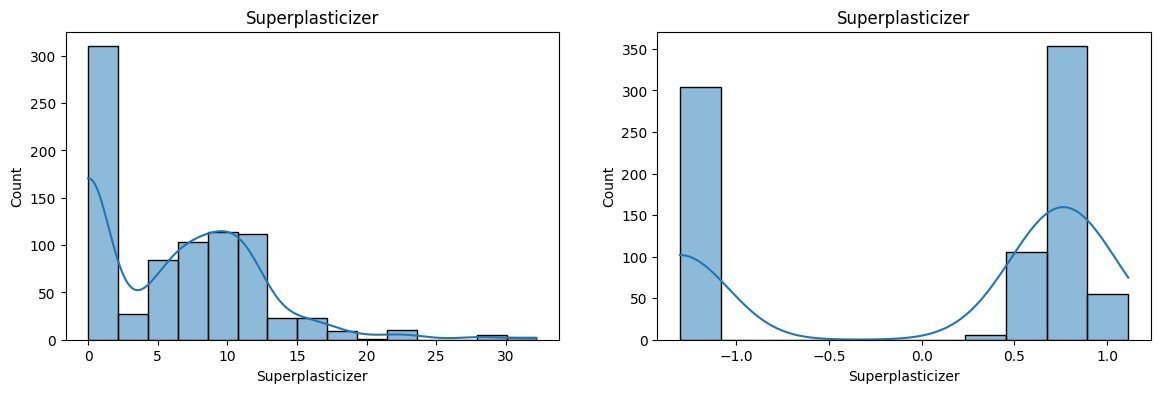

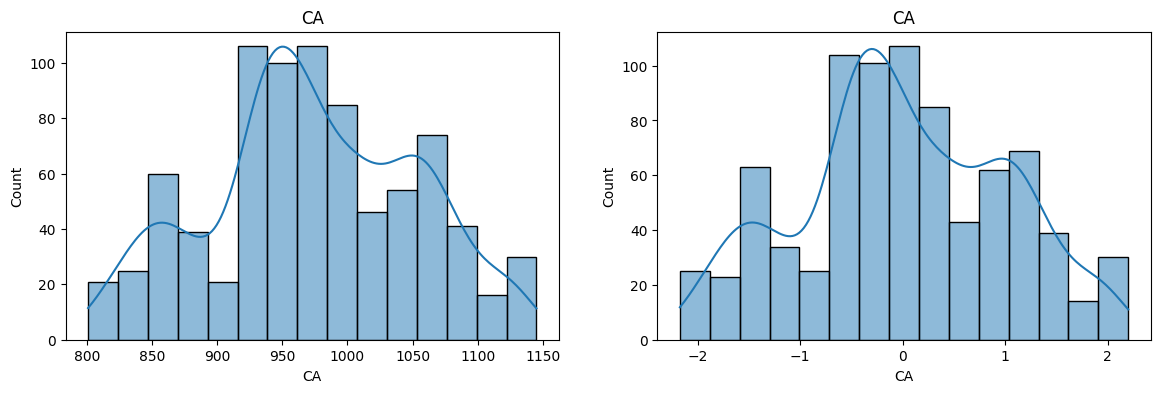

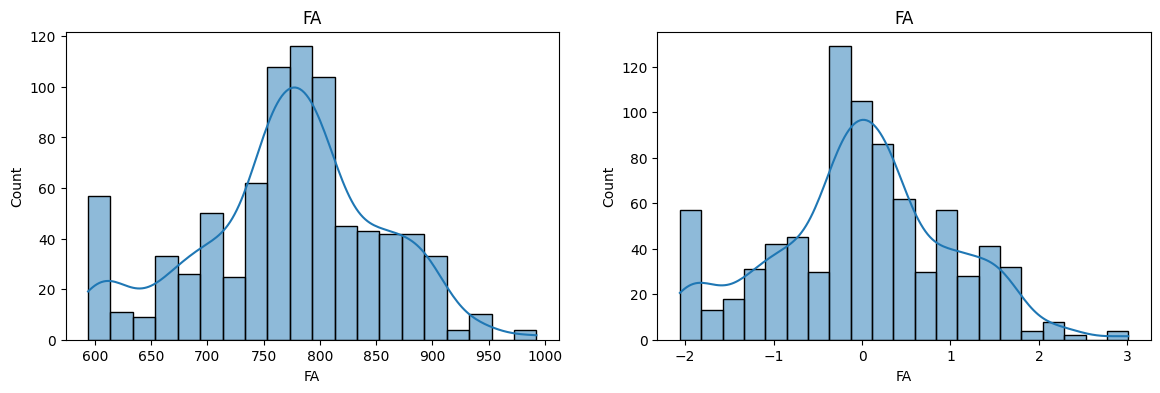

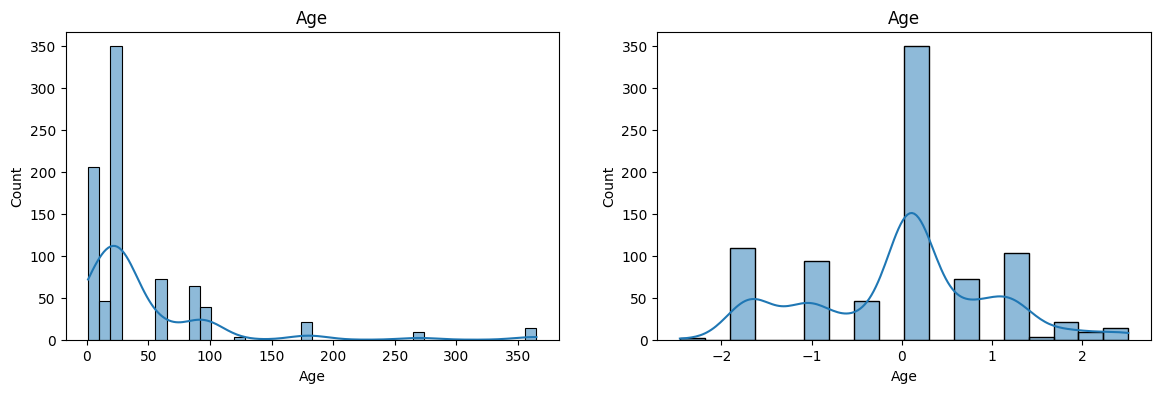

In [27]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)
for col in X_train.columns :
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed[col],kde=True)
    plt.title(col)
    
    plt.show()

Applying Yeo-Johnson transform

In [30]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)
print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo-Johnson_lambda':pt1.lambdas_})


0.8161906513354854


,cols,Yeo-Johnson_lambda
0,Cement,0.174348
1,Blast,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,CA,1.130050
6,FA,1.783100
7,Age,0.019885


Applying Cross val score

In [31]:
pt = PowerTransformer()
X_transfomed2 = pt.fit_transform(X)
lr = LinearRegression()
np.mean(cross_val_score(lr,X_transfomed2,y,scoring='r2'))

0.6834625141500866

Before and after comparison of Yeo_Johnson

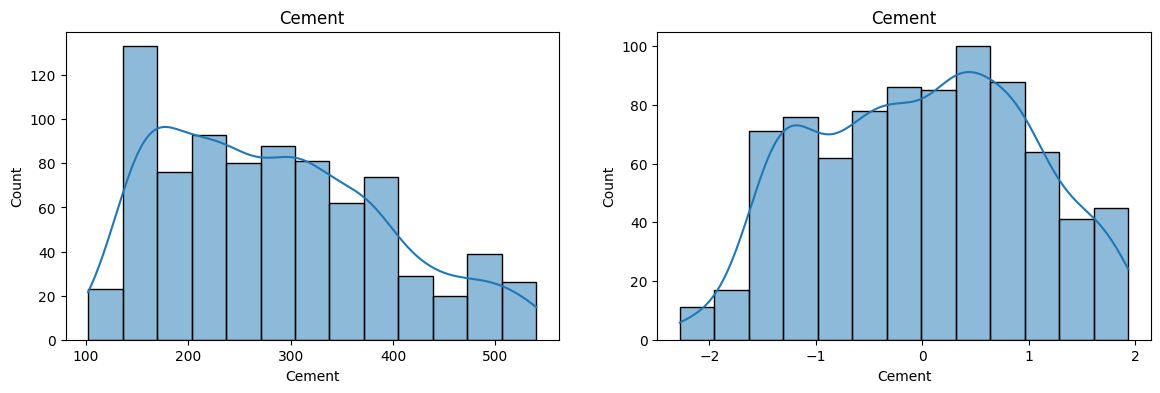

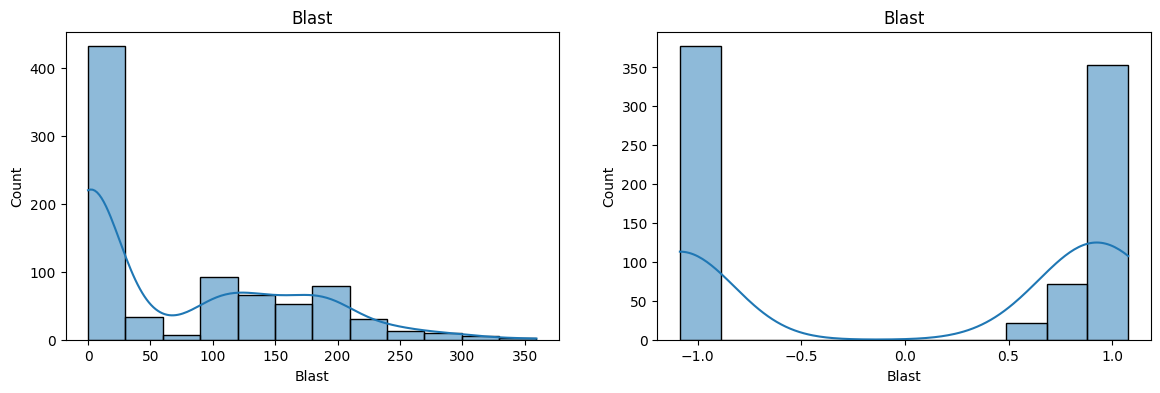

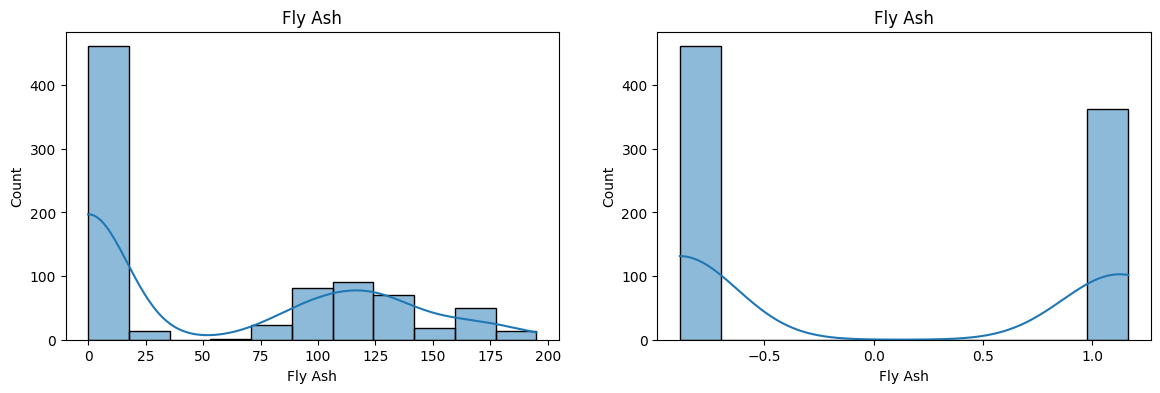

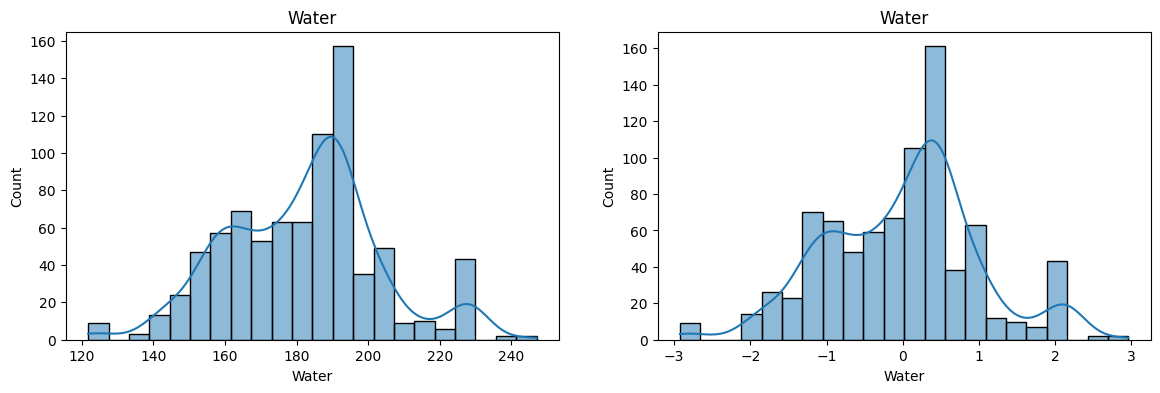

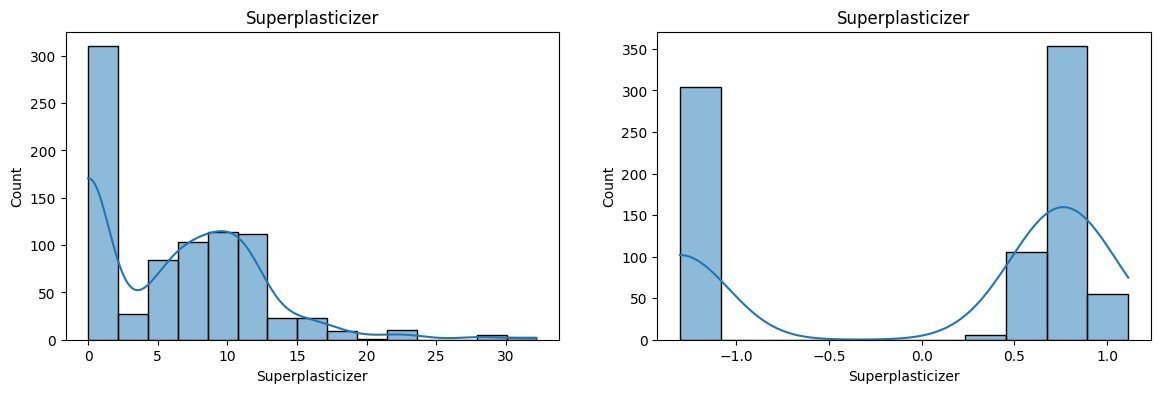

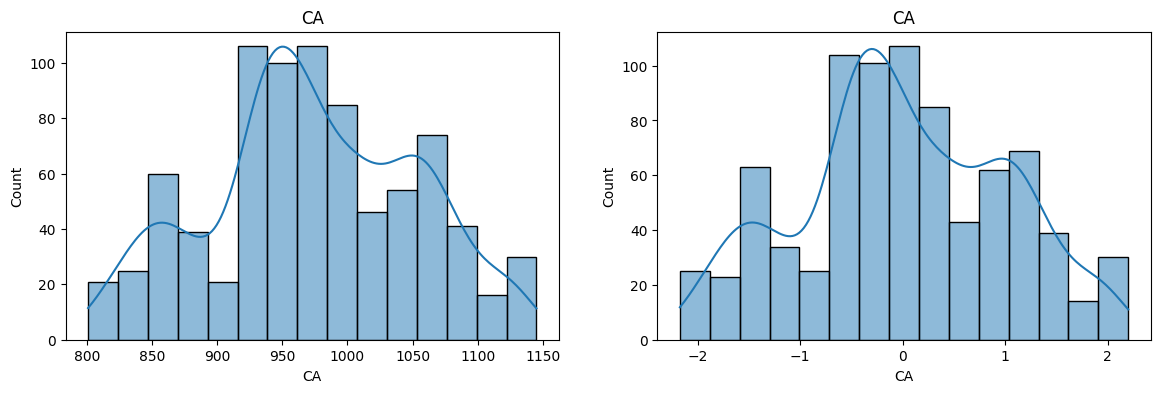

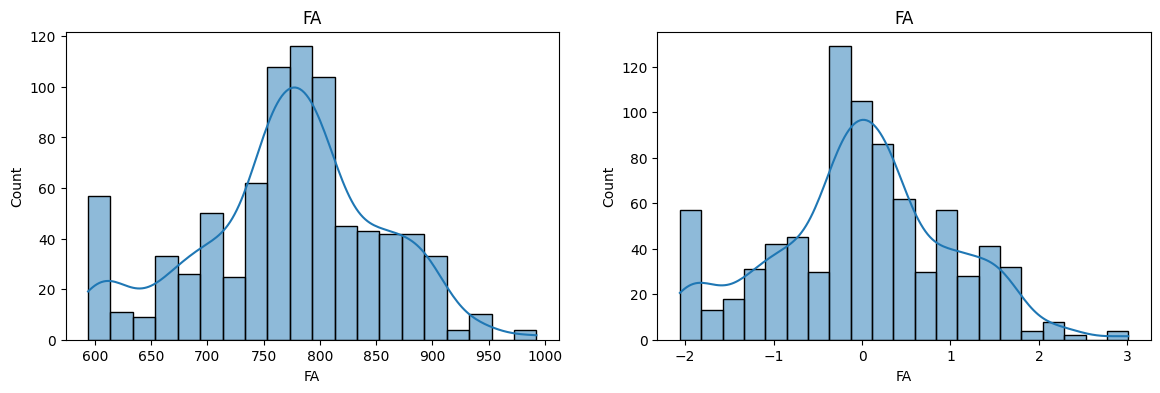

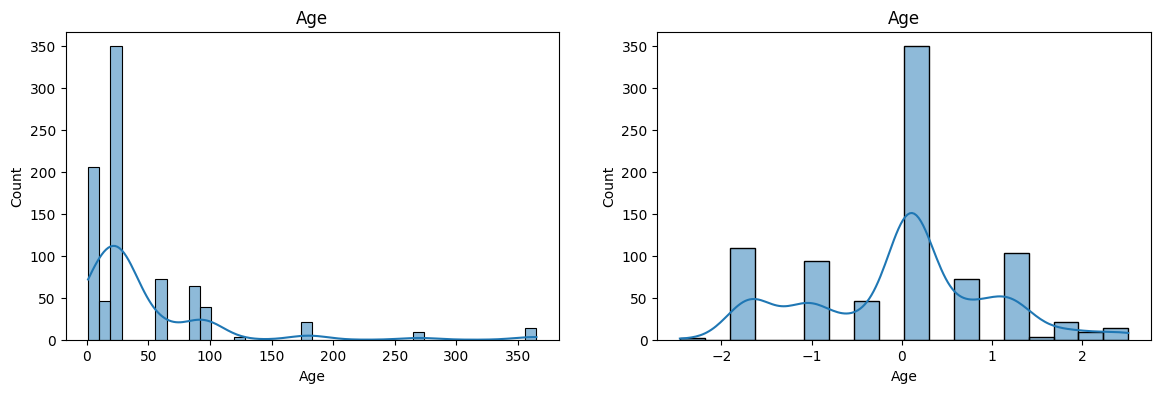

In [32]:
X_train_transformed2  = pd.DataFrame(X_train_transformed,columns=X_train.columns)
for col in X_train_transformed2.columns :
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed2[col],kde=True)
    plt.title(col)
    
    plt.show()